<a href="https://colab.research.google.com/github/xuezzou/Rebuild-My-Professor/blob/main/Tags-Prediction/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word Embedding
This notebook is part of the source code of our project to predict professor tages based on user comment. It uses Word2Vec (provided by gensim) to train a custom embedding of the words that appeared in our comments databased collected from ratemyprofessors.com. 

You do not need to rerun this notebook to run our model notebooks.
To run this notebook, first add [our drive](https://drive.google.com/drive/folders/15wGLUvjiGtFXMZ0XzpDYeSH1XEqWjUBB) as shortcut to your google drive or change the path below. 

For more information, please visit our [github repository](https://github.com/xuezzou/Rebuild-My-Professor/tree/main/Tags-Prediction).

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize
from google.colab import drive
import nltk
import os
from gensim.models import Word2Vec
from tqdm import tqdm
import json
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec, KeyedVectors  

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_path = "/content/drive/My Drive/Rebuild my Professor/data/Ratings/"
files = [file for file in os.listdir(input_path) if file.endswith("csv")]
data = []
for file in tqdm(files):
  df = pd.read_csv(input_path + file, engine="python", index_col = 0)
  data.append(df)
data = pd.concat(data)

100%|██████████| 97/97 [01:22<00:00,  1.17it/s]


In [ ]:
nltk.download('punkt')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
comments = data["rComments"].tolist()
sentences = []
for eachComment in tqdm(comments): 
  if isinstance(eachComment, str):
    tmp = tokenizer.tokenize(eachComment)
    sentences.extend(tmp)
print(len(sentences), " sentences are collected.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 3207500/3207500 [05:19<00:00, 10043.07it/s]

12077489  sentences are collected.


In [ ]:
all_words = []
for i, sent in tqdm(enumerate(sentences)):
  all_words.append(nltk.word_tokenize(sent))
  if (i % 1000000 == 0) & (i > 0):
    k = i / 1000000
    with open('/content/drive/My Drive/Rebuild my Professor/Word_Embeddings/words_{}.json'.format(int(k)), 'w') as f:
      json.dump(all_words, f)
    all_words = []
with open('/content/drive/My Drive/Rebuild my Professor/Word_Embeddings/words_{}.json'.format(i / 1000000 + 1), 'w') as f:
  json.dump(all_words, f)

12077489it [31:01, 6488.01it/s]


In [ ]:
from IPython import get_ipython;   
get_ipython().magic('reset -sf')

In [ ]:
input_path = "/content/drive/My Drive/Rebuild my Professor/Word_Embeddings/"
word_files = os.listdir(input_path)
all_words = []
for file_name in tqdm(word_files[:6]):
  with open(input_path + file_name, 'r') as j:
     words = json.loads(j.read())
  all_words.extend(words)

100%|██████████| 6/6 [00:35<00:00,  5.97s/it]


In [ ]:
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        self.epoch += 1

word2vec = Word2Vec(sentences=all_words, size=32, min_count=2, window=5, workers=4, iter=5, compute_loss=True, callbacks=[callback()])

Loss after epoch 0: 23292604.0
Loss after epoch 1: 38731380.0
Loss after epoch 2: 50209960.0
Loss after epoch 3: 61048908.0
Loss after epoch 4: 67507392.0


In [ ]:
 word2vec.wv.save_word2vec_format('/content/drive/My Drive/Rebuild my Professor/word2vec_model.bin', binary=True)

# Understanding the Word2Vec embedding space
Below, we showed the most similar words of several domain specific words to have a better understanding of the word2vec embedding we trained.

In [ ]:
word2vec.wv.most_similar('office', topn=20)

[('offfice', 0.8448866009712219),
 ('offie', 0.8379395604133606),
 ('offices', 0.8354521989822388),
 ('offce', 0.8246065378189087),
 ('officer', 0.8136253356933594),
 ('class/office', 0.8086735010147095),
 ('classoffice', 0.8015520572662354),
 ('non-office', 0.8014777302742004),
 ('offic', 0.8000969886779785),
 ('Office', 0.7996500730514526),
 ('ofice', 0.7953187227249146),
 ('offcie', 0.7901627421379089),
 ('lecture/office', 0.7767406702041626),
 ('lectures/office', 0.7632799744606018),
 ('sessions/office', 0.747004508972168),
 ('discussion/office', 0.7390647530555725),
 ('OH', 0.7348949313163757),
 ('person/office', 0.7245435118675232),
 ('section/office', 0.7152190208435059),
 ('-Office', 0.7151581048965454)]

In [ ]:
word2vec.wv.most_similar('paper', topn=20)

[('paper-', 0.9070572853088379),
 ('project', 0.837800145149231),
 ('essay', 0.8280050754547119),
 ('10-page', 0.8126891851425171),
 ('report', 0.8125085234642029),
 ('portfolio', 0.81093829870224),
 ('paper..', 0.8039724826812744),
 ('assignment', 0.793095052242279),
 ('proposal', 0.7926038503646851),
 ('memo', 0.7921077013015747),
 ('presentation', 0.7872051000595093),
 ('15-page', 0.787093997001648),
 ('10pg', 0.7799932956695557),
 ('papers', 0.7779519557952881),
 ('write-up', 0.7767899036407471),
 ('single-spaced', 0.7754182815551758),
 ('draft', 0.7730504274368286),
 ('double-spaced', 0.7677140235900879),
 ('term', 0.7649765014648438),
 ('bibliography', 0.7626125812530518)]

In [ ]:
word2vec.wv.most_similar('exam', topn=20)

[('test', 0.9551643133163452),
 ('midterm', 0.8961329460144043),
 ('midterm/final', 0.8500328063964844),
 ('quiz/test', 0.8352929949760437),
 ('midterms', 0.8352903723716736),
 ('prelim', 0.8258877992630005),
 ('quiz', 0.8225173354148865),
 ('quiz/exam', 0.8224886059761047),
 ('mid-term', 0.8112274408340454),
 ('assignment', 0.8016765117645264),
 ('test-', 0.7985386848449707),
 ('exams', 0.7877798080444336),
 ('exam..', 0.7841967344284058),
 ('MT', 0.7773595452308655),
 ('test..', 0.7770397663116455),
 ('exam/quiz', 0.7669656276702881),
 ('mt', 0.7646132707595825),
 ('test/quiz', 0.7543649673461914),
 ('midterm-', 0.7521929144859314),
 ('essay', 0.7449544668197632)]

In [ ]:
word2vec.wv.most_similar('professor', topn=20)

[('teacher', 0.9774253368377686),
 ('prof', 0.9772658944129944),
 ('instructor', 0.9416685700416565),
 ('prof.', 0.920424222946167),
 ('proffesor', 0.8987956047058105),
 ('profesor', 0.8728647232055664),
 ('person', 0.857303261756897),
 ('proffessor', 0.8554110527038574),
 ('professor-', 0.8447027206420898),
 ('lecturer', 0.8404526710510254),
 ('woman', 0.8090539574623108),
 ('guy', 0.8069437146186829),
 ('teacher-', 0.8040547370910645),
 ('man', 0.7972139120101929),
 ('educator', 0.7927772998809814),
 ('Teacher', 0.7921923398971558),
 ('proff', 0.7918639183044434),
 ('lecturer-', 0.774010181427002),
 ('dude', 0.7735586166381836),
 ('professor..', 0.7711555361747742)]

In [ ]:
word2vec.wv.most_similar('curve', topn=20)

[('curve..', 0.7614126205444336),
 ('Curve', 0.7312848567962646),
 ('score', 0.7086985111236572),
 ('scale', 0.6935360431671143),
 ('curving', 0.6898989081382751),
 ('grade', 0.6836727261543274),
 ('surprise', 0.6542413234710693),
 ('curves', 0.6245114207267761),
 ('+-', 0.6179966926574707),
 ('curve-', 0.6172598600387573),
 ('retakes', 0.6086616516113281),
 ('rubric', 0.6067304015159607),
 ('gsi', 0.6048409938812256),
 ('TF', 0.6001451015472412),
 ('B/high', 0.5905258059501648),
 ('grade-', 0.5884222984313965),
 ('Generously', 0.585517168045044),
 ('95.6', 0.5845207571983337),
 ('budge', 0.5773179531097412),
 ('grader.He', 0.5765093564987183)]

In [ ]:
word2vec.wv.most_similar('grade', topn=20)

[('score', 0.888958215713501),
 ('grade-', 0.8564148545265198),
 ('grade..', 0.8370355367660522),
 ('GPA', 0.796845555305481),
 ('grades', 0.7652790546417236),
 ('gpa', 0.7598588466644287),
 ('scores', 0.7448750734329224),
 ('gsi', 0.7285569310188293),
 ('grade.She', 0.7083241939544678),
 ('GSI', 0.7031882405281067),
 ('grade.If', 0.7011852264404297),
 ('curve', 0.6836726665496826),
 ('teammates', 0.680732250213623),
 ('weight', 0.6442605257034302),
 ('opinion..', 0.6394960284233093),
 ('partner', 0.6356966495513916),
 ('performance', 0.6282052397727966),
 ('.anyway', 0.6259369254112244),
 ('portfolio', 0.6249605417251587),
 ('tuitions', 0.6236144304275513)]

In [ ]:
word2vec.wv.most_similar('A', topn=20)

[('A/A-', 0.8872286677360535),
 ('A/B', 0.8814757466316223),
 ('A+', 0.8543083071708679),
 ('a.', 0.8517325520515442),
 ('A.', 0.8512063026428223),
 ('A..', 0.830458402633667),
 ('A-', 0.7871443629264832),
 ('A/A+', 0.7763746976852417),
 ('B+/A-', 0.7713622450828552),
 ('A-/B+', 0.7629518508911133),
 ('A-/A', 0.7516396045684814),
 ('A/AB', 0.7430094480514526),
 ("'A", 0.7325279116630554),
 ('a-', 0.7292481660842896),
 ('A~', 0.728992223739624),
 ('A.I', 0.7212188839912415),
 ('extension', 0.7145677208900452),
 ('F', 0.7037407159805298),
 ('F.', 0.7013682126998901),
 ('A.He', 0.7012124061584473)]

In [ ]:
word2vec.wv.most_similar('C', topn=20)

[('C-', 0.9503031373023987),
 ('B-', 0.9467709064483643),
 ('B', 0.9450910687446594),
 ('B+', 0.9396100640296936),
 ('C+', 0.9285691976547241),
 ('D', 0.9248325228691101),
 ('D-', 0.9228590726852417),
 ('b-', 0.9152387380599976),
 ('D+', 0.9112502336502075),
 ('c-', 0.9091811180114746),
 ('D.', 0.8841480016708374),
 ('b+', 0.8684453964233398),
 ('93', 0.8611010313034058),
 ('C.', 0.8591713309288025),
 ('c+', 0.8573942184448242),
 ('3.0', 0.8555498123168945),
 ('94', 0.8523093461990356),
 ('c', 0.8519816398620605),
 ('96', 0.848919153213501),
 ('92', 0.841126024723053)]

In [ ]:
word2vec.wv.most_similar('C++', topn=20)

[('Java', 0.9568295478820801),
 ('python', 0.93168044090271),
 ('java', 0.9223167896270752),
 ('Python', 0.889715313911438),
 ('circuits', 0.8673341274261475),
 ('probability', 0.8532583117485046),
 ('c++', 0.8396586775779724),
 ('statistics', 0.8290060758590698),
 ('SQL', 0.8272294998168945),
 ('regression', 0.8096137046813965),
 ('biochemistry', 0.8057542443275452),
 ('econometrics', 0.8038753867149353),
 ('biology', 0.8029372096061707),
 ('algorithms', 0.797566294670105),
 ('mathematics', 0.7973673939704895),
 ('calculus', 0.796259880065918),
 ('Matlab', 0.7961695790290833),
 ('derivatives', 0.7947729825973511),
 ('marketing', 0.7934837937355042),
 ('principles', 0.7934430837631226)]

In [ ]:
word2vec.wv.most_similar('timed', topn=20)

[('open-book', 0.8851839900016785),
 ('open-note', 0.8814364671707153),
 ('proctored', 0.8725665807723999),
 ('take-home', 0.8525376319885254),
 ('multiple-choice', 0.807465672492981),
 ('biweekly', 0.805736243724823),
 ('Finals', 0.8051190376281738),
 ('Map', 0.7776305675506592),
 ('Written', 0.7747001647949219),
 ('non-cumulative', 0.7702422142028809),
 ('FRQ', 0.7695075273513794),
 ('free-response', 0.7683980464935303),
 ('weekly', 0.767899215221405),
 ('noncumulative', 0.7636311054229736),
 ('quizs', 0.7634577751159668),
 ('Response', 0.7608276605606079),
 ('takehome', 0.7595908641815186),
 ('Pop', 0.7545723915100098),
 ('mini', 0.751979649066925),
 ('Weekly', 0.7515791654586792)]

In [ ]:
word2vec.wv.most_similar('math', topn=20)

[('physics', 0.9308289289474487),
 ('chemistry', 0.8925142884254456),
 ('accounting', 0.8854146003723145),
 ('econ', 0.8737497329711914),
 ('chem', 0.861601710319519),
 ('stats', 0.8568164706230164),
 ('spanish', 0.837165892124176),
 ('CS', 0.8346633315086365),
 ('calculus', 0.8312638401985168),
 ('Chemistry', 0.8211394548416138),
 ('maths', 0.8203173875808716),
 ('Spanish', 0.8197668790817261),
 ('statistics', 0.8172283172607422),
 ('bio', 0.8128029108047485),
 ('ochem', 0.8110219240188599),
 ('biology', 0.8108948469161987),
 ('mathematics', 0.7862789630889893),
 ('economics', 0.7819921970367432),
 ('finance', 0.7778773307800293),
 ('Physics', 0.7707668542861938)]

In [ ]:
word2vec.wv.most_similar('extra', topn=20)

[('xtra', 0.9003012180328369),
 ('Extra', 0.8779666423797607),
 ('curves/extra', 0.8445723056793213),
 ('bonus', 0.8432154655456543),
 ('partial', 0.8060284852981567),
 ('exta', 0.8038235902786255),
 ('EC', 0.7670366168022156),
 ('extra-credit', 0.7643975019454956),
 ('owl', 0.761504054069519),
 ('x-tra', 0.7582939863204956),
 ('Partial', 0.7507591247558594),
 ('ec', 0.7463140487670898),
 ('Xtra', 0.7307668924331665),
 ('debits', 0.7303364872932434),
 ('-extra', 0.7298237681388855),
 ('E.C', 0.7176017761230469),
 ('credit/no', 0.7156850099563599),
 ('iclicker', 0.7123750448226929),
 ('XC', 0.7086117267608643),
 ('i-clicker', 0.6988398432731628)]

In [ ]:
word2vec.wv.most_similar('Vanderbilt', topn=20)

[('Cornell', 0.985726535320282),
 ('Duke', 0.985148549079895),
 ('Georgetown', 0.9827951192855835),
 ('Emory', 0.9814165830612183),
 ('WashU', 0.9803495407104492),
 ('Vandy', 0.9771180748939514),
 ('Gonzaga', 0.9745078086853027),
 ('TCU', 0.9743008017539978),
 ('USC', 0.9737849235534668),
 ('UCSB', 0.9734106659889221),
 ('UVA', 0.9717364311218262),
 ('UF', 0.9710806608200073),
 ('Tufts', 0.9709715247154236),
 ('NYU', 0.9703435897827148),
 ('Tulane', 0.9675183296203613),
 ('Berkeley', 0.9658113121986389),
 ('UCI', 0.9653502702713013),
 ('Marquette', 0.9649713039398193),
 ('DU', 0.9640470743179321),
 ('Elon', 0.9632534980773926)]

In [ ]:
keys = ['paper', 'exam', 'math', 'homework', 'curve', 'extra', 'professor', 'great', 'helpful', 'Vanderbilt']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



We can also visualize the embedding by reducing the dimension and plotting several words and their most similar words in one graph.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

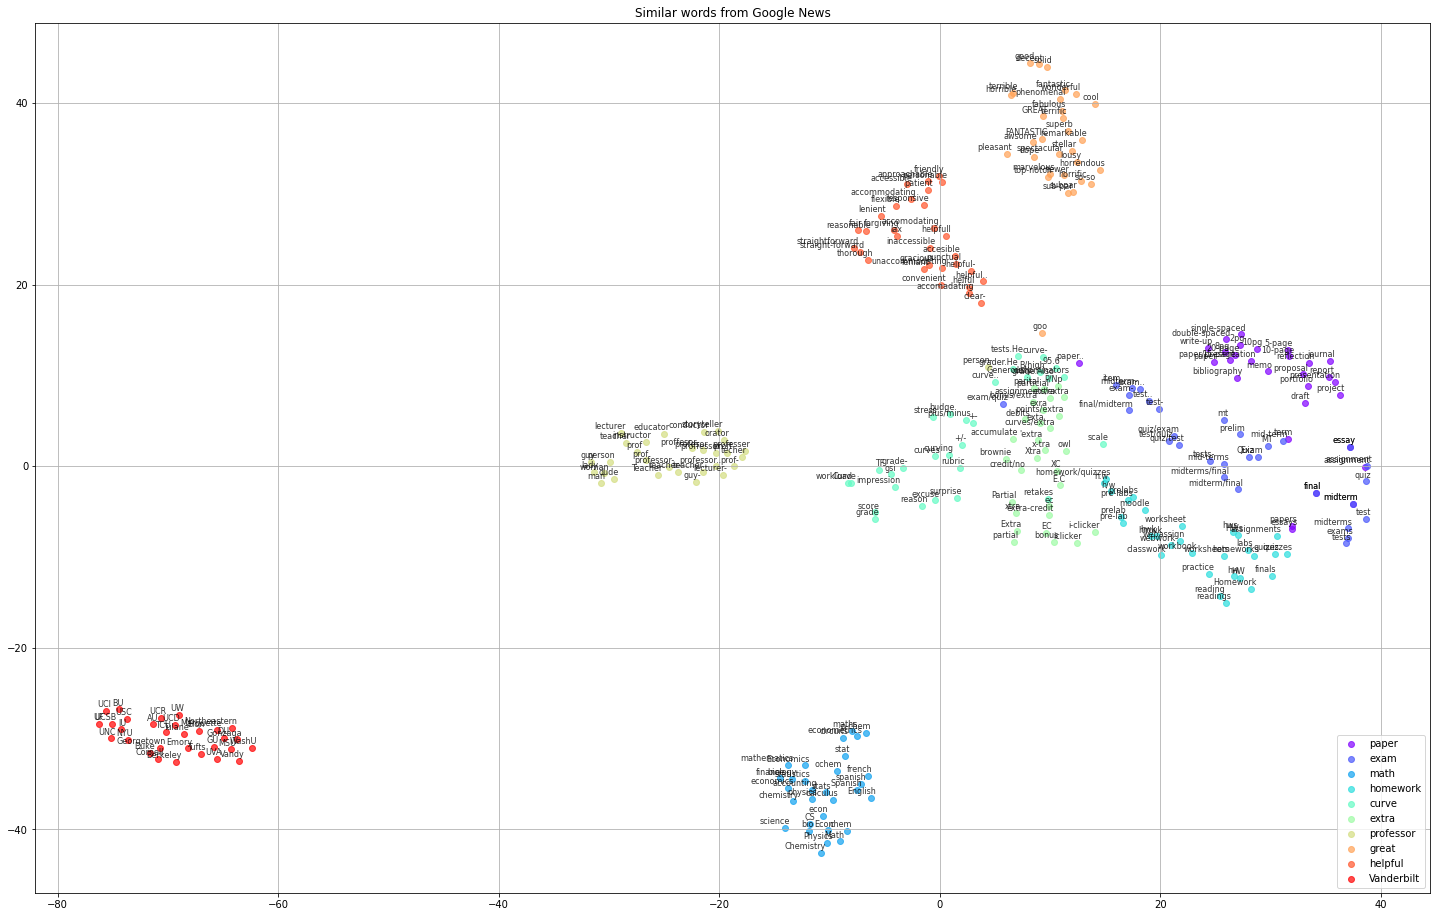

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(25, 16))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.8, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

# Text Classification Model

In [2]:
from gensim.test.utils import datapath
word2vec = KeyedVectors.load_word2vec_format(datapath("/content/drive/My Drive/Rebuild my Professor/Radar Chart notebooks/word2vec_model.bin"), binary=True)

In [3]:
import torch
import torch.nn as nn

weights = torch.FloatTensor(word2vec.wv.vectors)
embedding = nn.Embedding.from_pretrained(weights)
embedded_words = word2vec.vocab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [4]:
import os

input_path = "/content/drive/My Drive/Rebuild my Professor/data/Ratings/"
df = pd.DataFrame()
for file in tqdm(os.listdir(input_path)):
  if file.endswith("csv"):
    df_temp = pd.read_csv(input_path + file, lineterminator='\n')
    df_temp = df_temp.sample(frac=0.01)
    df = df.append(df_temp)

100%|██████████| 103/103 [01:45<00:00,  1.02s/it]


In [5]:
df=df.loc[:,['rComments','teacherRatingTags']]
df = df[df['teacherRatingTags'] != '[]']

In [6]:
import ast 
df['teacherRatingTags'] = df['teacherRatingTags'].apply(ast.literal_eval)

In [7]:
# One-hot encoding of multilabel
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_tags = pd.DataFrame(mlb.fit_transform(df['teacherRatingTags']),columns=mlb.classes_)

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))

def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # Removing stopwords
    tokenized_words = word_tokenize(sentence)
    sentence = [word for word in tokenized_words if (not word in stop_words) and (word in embedded_words)]

    return sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
sentences = [preprocess_text(sentence) for sentence in tqdm(df["rComments"])]

100%|██████████| 18236/18236 [00:04<00:00, 3763.18it/s]


In [10]:
def encode_sentence(sentence, N=150):
  encoded = np.zeros(N, dtype=int)
  enc1 = np.array([embedded_words[word].index for word in sentence])
  encoded[:len(enc1)] = enc1
  return encoded

In [11]:
MAX_LENGTH = 150
encoded_sentences = [encode_sentence(sentence, MAX_LENGTH) for sentence in tqdm(sentences)]

100%|██████████| 18236/18236 [00:00<00:00, 79350.62it/s]


In [12]:
X = np.array(encoded_sentences)
y = df_tags

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [13]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate



from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re

In [14]:
lstm_out = 196

MAX_LENGTH = 150
MAX_FEATURE = len(word2vec.vocab)
WEIGHTS = word2vec.vectors
EMBEDDING_DIM = WEIGHTS.shape[1]


model = Sequential()
model.add(Embedding(MAX_FEATURE, 
                    EMBEDDING_DIM,
                    weights=[WEIGHTS],
                    input_length=MAX_LENGTH))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 32)           4603744   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 150, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               179536    
_________________________________________________________________
dense (Dense)                (None, 20)                3940      
Total params: 4,787,220
Trainable params: 4,787,220
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
import tensorflow as tf
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


2.4.1
Found GPU at: /device:GPU:0


In [16]:
batch_size = 128
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, verbose = 1)

Epoch 1/10
114/114 [==============================] - 62s 503ms/step - loss: 8.0999 - accuracy: 0.0635
Epoch 2/10
114/114 [==============================] - 59s 520ms/step - loss: 8.1358 - accuracy: 0.1049
Epoch 3/10
114/114 [==============================] - 57s 502ms/step - loss: 8.1034 - accuracy: 0.0652
Epoch 4/10
114/114 [==============================] - 56s 493ms/step - loss: 8.1096 - accuracy: 0.0876
Epoch 5/10
114/114 [==============================] - 56s 496ms/step - loss: 8.1687 - accuracy: 0.1239
Epoch 6/10
114/114 [==============================] - 57s 498ms/step - loss: 8.1271 - accuracy: 0.1110
Epoch 7/10
114/114 [==============================] - 56s 492ms/step - loss: 8.2196 - accuracy: 0.0806
Epoch 8/10
114/114 [==============================] - 56s 493ms/step - loss: 8.2595 - accuracy: 0.1323
Epoch 9/10
114/114 [==============================] - 56s 490ms/step - loss: 8.2416 - accuracy: 0.0938
Epoch 10/10
114/114 [==============================] - 56s 490ms/step - l

In [17]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(sentences[""])
X = tokenizer.texts_to_sequences(new_df['rComments'].values)
X = pad_sequences(X)
# print(X[:2])

Y = pd.get_dummies(new_df[category]).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)

TypeError: ignored